In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

In [31]:
df1 = pd.read_csv('../FilteredInput/RISdata_1990_2000_yearly.csv')
df2 = pd.read_csv('../FilteredInput/RISdata_2010_2020_yearly.csv')

climate_df = pd.read_csv('../weather/weather_data_yearly_cleaned.csv')  # Change this to your actual filename


In [32]:
insect_df = pd.concat([df1, df2], ignore_index=True)
# Drop the index column
insect_df = insect_df.drop(columns=['#'])

In [33]:
# Rename columns for clarity
insect_df.columns = ['Trap', 'Insect', 'Year', 'Total', 'Trap_Days']
climate_df.columns = ['Year', 'Mean_Temp', 'Total_Rainfall']

In [34]:
# Merge insect data with climate data
merged_df = pd.merge(insect_df, climate_df, on='Year', how='inner')

In [35]:
# Create normalized insect count
merged_df['Insects_Per_Day'] = merged_df['Total'] / merged_df['Trap_Days']

In [36]:
merged_df.head()


,Trap,Insect,Year,Total,Trap_Days,Mean_Temp,Total_Rainfall,Insects_Per_Day
0,Rothamsted,Metopolophium dirhodum,1990,579,365,10.471347,709.00356,1.586301
1,Rothamsted,Metopolophium dirhodum,1991,415,365,9.143046,776.32242,1.136986
2,Rothamsted,Metopolophium dirhodum,1992,4775,366,10.002850,714.42002,13.046448
3,Rothamsted,Metopolophium dirhodum,1993,381,365,9.488239,935.72110,1.043836
4,Rothamsted,Metopolophium dirhodum,1994,2583,365,9.593352,934.50516,7.076712


In [37]:
# Check the result
print(f"Merged data shape: {merged_df.shape}")
print(f"\nColumns: {merged_df.columns.tolist()}")
print(f"\nYears covered: {merged_df['Year'].min()} to {merged_df['Year'].max()}")
print(f"\nInsect species: {merged_df['Insect'].unique()}")
print(f"\nSample data:")
print(merged_df.head())

Merged data shape: (66, 8)

Columns: ['Trap', 'Insect', 'Year', 'Total', 'Trap_Days', 'Mean_Temp', 'Total_Rainfall', 'Insects_Per_Day']

Years covered: 1990 to 2020

Insect species: ['Metopolophium dirhodum' 'Rhopalosiphum padi' 'Sitobion avenae']

Sample data:
         Trap                  Insect  Year  Total  Trap_Days  Mean_Temp  \
0  Rothamsted  Metopolophium dirhodum  1990    579        365  10.471347   
1  Rothamsted  Metopolophium dirhodum  1991    415        365   9.143046   
2  Rothamsted  Metopolophium dirhodum  1992   4775        366  10.002850   
3  Rothamsted  Metopolophium dirhodum  1993    381        365   9.488239   
4  Rothamsted  Metopolophium dirhodum  1994   2583        365   9.593352   

   Total_Rainfall  Insects_Per_Day  
0       709.00356         1.586301  
1       776.32242         1.136986  
2       714.42002        13.046448  
3       935.72110         1.043836  
4       934.50516         7.076712  


In [38]:
#show all the rows and colums
#pd.set_option('display.max_rows', None)
merged_df.head(10)

,Trap,Insect,Year,Total,Trap_Days,Mean_Temp,Total_Rainfall,Insects_Per_Day
0,Rothamsted,Metopolophium dirhodum,1990,579,365,10.471347,709.00356,1.586301
1,Rothamsted,Metopolophium dirhodum,1991,415,365,9.143046,776.32242,1.136986
2,Rothamsted,Metopolophium dirhodum,1992,4775,366,10.002850,714.42002,13.046448
3,Rothamsted,Metopolophium dirhodum,1993,381,365,9.488239,935.72110,1.043836
4,Rothamsted,Metopolophium dirhodum,1994,2583,365,9.593352,934.50516,7.076712
5,Rothamsted,Metopolophium dirhodum,1995,229,365,10.573170,706.90330,0.627397
6,Rothamsted,Metopolophium dirhodum,1996,1101,366,9.243593,652.73870,3.008197
7,Rothamsted,Metopolophium dirhodum,1997,5640,365,9.926231,633.17312,15.452055
8,Rothamsted,Metopolophium dirhodum,1998,41,365,10.258893,726.35834,0.112329
9,Rothamsted,Metopolophium dirhodum,1999,265,365,10.298190,951.63886,0.726027


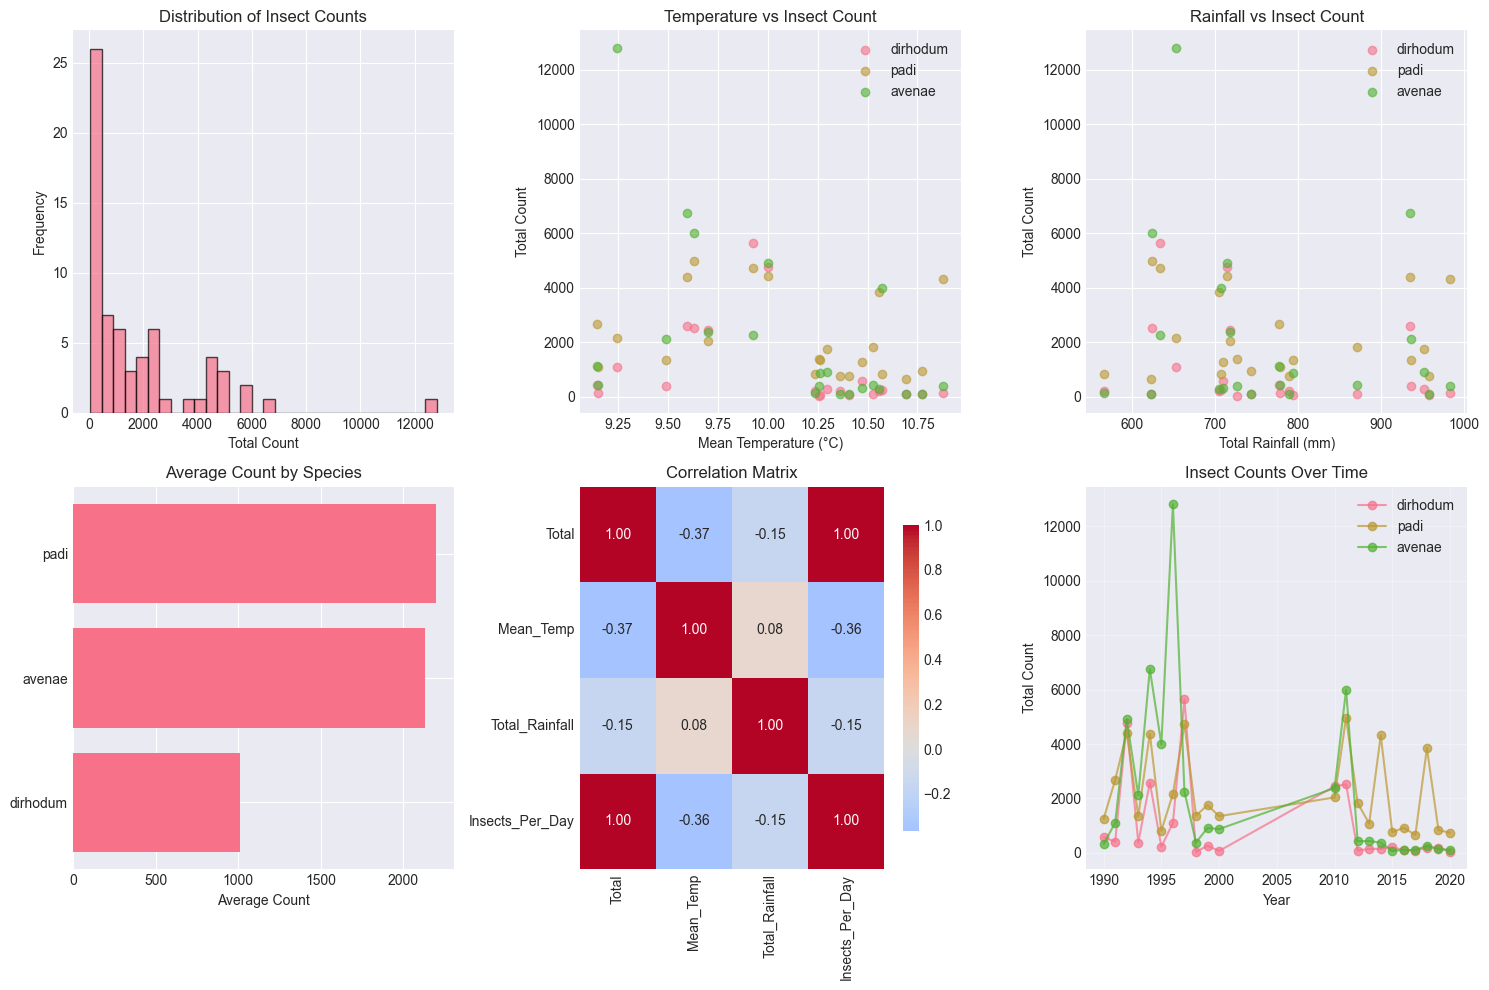


Summary by Species:
                          Total                      Mean_Temp              \
                           mean      std  min    max      mean   std   min   
Insect                                                                       
Metopolophium dirhodum  1013.14  1592.07   41   5640      10.1  0.54  9.14   
Rhopalosiphum padi      2195.00  1506.05  660   4968      10.1  0.54  9.14   
Sitobion avenae         2131.00  3119.90   83  12803      10.1  0.54  9.14   

                              Total_Rainfall                        
                          max           mean     std    min    max  
Insect                                                              
Metopolophium dirhodum  10.88         767.65  122.95  565.2  982.9  
Rhopalosiphum padi      10.88         767.65  122.95  565.2  982.9  
Sitobion avenae         10.88         767.65  122.95  565.2  982.9  


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Distribution of insect counts
axes[0, 0].hist(merged_df['Total'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Total Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Insect Counts')

# 2. Temperature vs Insect Count
for species in merged_df['Insect'].unique():
    species_data = merged_df[merged_df['Insect'] == species]
    axes[0, 1].scatter(species_data['Mean_Temp'], species_data['Total'], 
                      alpha=0.6, label=species.split()[-1])
axes[0, 1].set_xlabel('Mean Temperature (°C)')
axes[0, 1].set_ylabel('Total Count')
axes[0, 1].set_title('Temperature vs Insect Count')
axes[0, 1].legend()

# 3. Rainfall vs Insect Count
for species in merged_df['Insect'].unique():
    species_data = merged_df[merged_df['Insect'] == species]
    axes[0, 2].scatter(species_data['Total_Rainfall'], species_data['Total'], 
                      alpha=0.6, label=species.split()[-1])
axes[0, 2].set_xlabel('Total Rainfall (mm)')
axes[0, 2].set_ylabel('Total Count')
axes[0, 2].set_title('Rainfall vs Insect Count')
axes[0, 2].legend()

# 4. Average count by species
species_avg = merged_df.groupby('Insect')['Total'].mean().sort_values()
axes[1, 0].barh(range(len(species_avg)), species_avg.values)
axes[1, 0].set_yticks(range(len(species_avg)))
axes[1, 0].set_yticklabels([s.split()[-1] for s in species_avg.index])
axes[1, 0].set_xlabel('Average Count')
axes[1, 0].set_title('Average Count by Species')

# 5. Correlation heatmap
corr_cols = ['Total', 'Mean_Temp', 'Total_Rainfall', 'Insects_Per_Day']
correlation = merged_df[corr_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[1, 1], cbar_kws={'shrink': 0.8})
axes[1, 1].set_title('Correlation Matrix')

# 6. Time series by species
for species in merged_df['Insect'].unique():
    species_data = merged_df[merged_df['Insect'] == species]
    axes[1, 2].plot(species_data['Year'], species_data['Total'], 
                    marker='o', label=species.split()[-1], alpha=0.7)
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Total Count')
axes[1, 2].set_title('Insect Counts Over Time')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics by species
print("\nSummary by Species:")
print(merged_df.groupby('Insect')[['Total', 'Mean_Temp', 'Total_Rainfall']].agg(['mean', 'std', 'min', 'max']).round(2))


Linear Regression:
  R² Score: 0.391
  RMSE: 1245
  MAE: 983

Random Forest:
  R² Score: 0.380
  RMSE: 1256
  MAE: 965


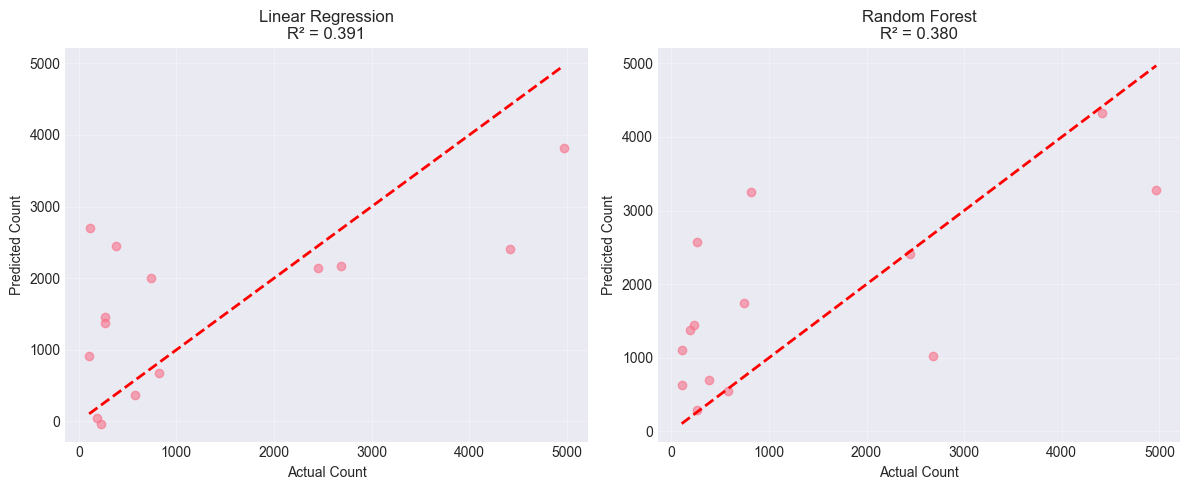


Feature Importance:
                     Feature  Importance
2               Temp_Squared    0.221075
0                  Mean_Temp    0.221023
5             Insect_Encoded    0.192698
4  Temp_Rainfall_Interaction    0.156581
1             Total_Rainfall    0.111968
3           Rainfall_Squared    0.096656


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Feature Engineering
merged_df['Temp_Squared'] = merged_df['Mean_Temp'] ** 2
merged_df['Rainfall_Squared'] = merged_df['Total_Rainfall'] ** 2
merged_df['Temp_Rainfall_Interaction'] = merged_df['Mean_Temp'] * merged_df['Total_Rainfall']

# Encode categorical variables
le_insect = LabelEncoder()
merged_df['Insect_Encoded'] = le_insect.fit_transform(merged_df['Insect'])

# Prepare features and target
feature_cols = ['Mean_Temp', 'Total_Rainfall', 'Temp_Squared', 'Rainfall_Squared', 
                'Temp_Rainfall_Interaction', 'Insect_Encoded']
X = merged_df[feature_cols]
y = merged_df['Total']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    results[name] = {
        'R2': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Predictions': y_pred
    }

# Display results
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  R² Score: {metrics['R2']:.3f}")
    print(f"  RMSE: {metrics['RMSE']:.0f}")
    print(f"  MAE: {metrics['MAE']:.0f}")

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, (name, metrics) in enumerate(results.items()):
    axes[idx].scatter(y_test, metrics['Predictions'], alpha=0.6)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Count')
    axes[idx].set_ylabel('Predicted Count')
    axes[idx].set_title(f'{name}\nR² = {metrics["R2"]:.3f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance for Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance)